In [1]:
import altair as alt
import geopandas as gpd
import hvplot.pandas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import requests
import folium
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import pandas as pd


file_path = "/Users/dennisespejo/Desktop/ncses_table_raw_data_SED_2025-02-07T17_04_09Z.csv"
df = pd.read_csv(file_path)

#
aggregated_data = df.groupby(["Major Fields (SED-CIP)", "Race and Ethnicity"])["Doctorate Recipients by Demographics"].sum().unstack(fill_value=0)


In [3]:
aggregated_data

Race and Ethnicity,"American Indian or Alaska Native, Not Hispanic or Latino","Asian, Not Hispanic or Latino","Black or African American, Not Hispanic or Latino",Ethnicity not reported,Ethnicity/Race suppressed for temporary visa holders,Hispanic or Latino,"More than one race, Not Hispanic or Latino","Other race or race not reported, Not Hispanic or Latino","White, Not Hispanic or Latino"
Major Fields (SED-CIP),,,,,,,,,
Anthropology,10,72,30,66,200,107,49,22,619
"Area, ethnic, cultural, and group studies",20,83,148,85,265,177,41,14,444
Astronomy and astrophysics,2,44,18,29,250,58,24,6,444
"Biological and biomedical sciences, general",2,184,101,215,585,179,71,24,1051
Chemistry,11,467,168,374,2817,427,165,63,3387
Clinical psychology,12,232,189,316,134,379,131,40,2143
Counseling/ applied psychology,11,214,441,306,335,414,132,54,2139
Economics,0,243,58,197,2444,116,36,24,981
"English language and literature, letters",11,120,153,189,336,178,91,33,1939


In [4]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x800 with 0 Axes>

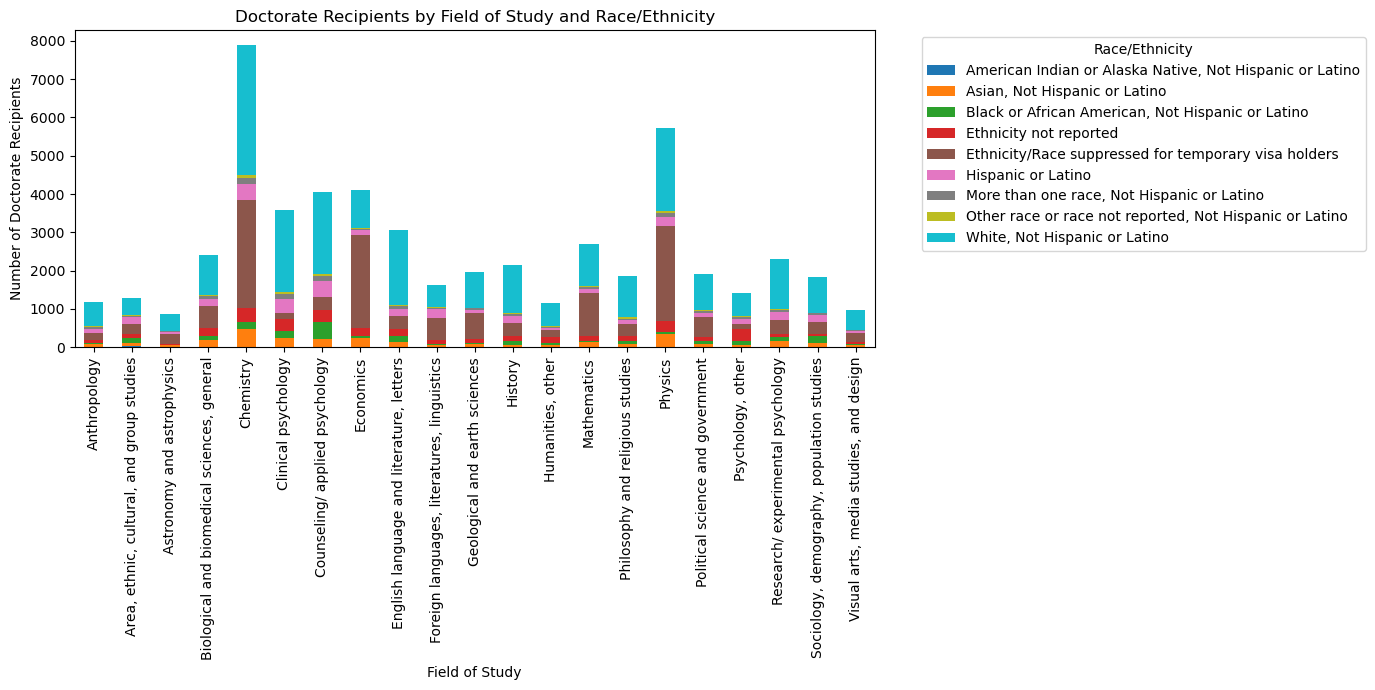

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))


aggregated_data.plot(kind="bar", stacked=True, colormap="tab10", figsize=(14, 7))


plt.xlabel("Field of Study")
plt.ylabel("Number of Doctorate Recipients")
plt.title("Doctorate Recipients by Field of Study and Race/Ethnicity")
plt.legend(title="Race/Ethnicity", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display



df = pd.read_csv(file_path)






aggregated_data = df.groupby(["Major Fields (SED-CIP)", "Race and Ethnicity"])["Doctorate Recipients by Demographics"].sum().unstack(fill_value=0)


field_dropdown = widgets.Dropdown(
    options=aggregated_data.index,
    description="Field of Study:",
    style={'description_width': 'initial'}
)


def update_chart(field):
    field_data = aggregated_data.loc[field]
    fig = px.bar(
        y=field_data.index,
        x=field_data.values,
        labels={'y': 'Race/Ethnicity', 'x': 'Number of Doctorate Recipients'},
        title=f"Racial Makeup of Doctorate Recipients in {field}",
        text_auto=True,
        color=field_data.index
    )
    fig.show()


widgets.interactive(update_chart, field=field_dropdown)


interactive(children=(Dropdown(description='Field of Study:', options=('Anthropology', 'Area, ethnic, cultural…

In [7]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Load Data

df = pd.read_csv(file_path)

# Aggregate Data
aggregated_data = df.groupby(["Major Fields (SED-CIP)", "Race and Ethnicity"])["Doctorate Recipients by Demographics"].sum().unstack(fill_value=0)

# Dropdown Widget
field_dropdown = widgets.Dropdown(
    options=aggregated_data.index,
    description="Select Field:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Function to Update Chart
def update_chart(field):
    field_data = aggregated_data.loc[field].sort_values(ascending=True)  # Sort for better visualization
    
    fig = px.bar(
        y=field_data.index,
        x=field_data.values,
        orientation="h",
        labels={'y': 'Race/Ethnicity', 'x': 'Doctorate Recipients'},
        title=f"📊 Racial Makeup of Doctorate Recipients in {field}",
        text_auto=True,
        color=field_data.index,
        color_discrete_sequence=px.colors.qualitative.Set2,
    
    )
    
    fig.update_layout(
        font=dict(size=14),
        margin=dict(l=100, r=20, t=60, b=40),
        height=500
    )
    
    fig.show()

# Display Interactive Widget
dashboard = widgets.VBox([field_dropdown, widgets.interactive_output(update_chart, {'field': field_dropdown})])
display(dashboard)


In [23]:
df2=pd.read_csv("/Users/dennisespejo/Desktop/ncses_table_raw_data_SED_2025-02-07T17_44_33Z.csv")



ivy_plus_schools = [
    "Brown U.", "Chicago U", "Columbia U. in the City of New York", "Cornell U.",
    "Dartmouth C.", "Duke U.", "Harvard U.", 
    "Massachusetts Institute of Technology", "U. Pennsylvania", 
    "Princeton U.", "Stanford U.", "Yale U."
]


df2["Institution Category"] = df2["Institution Name"].apply(lambda x: "Ivy Plus" if x in ivy_plus_schools else "Non-Ivy Plus")



In [24]:
df2

,Year,Institution Name,Major Fields (SED-CIP),Doctorate Recipients by Institution,Institution Category
0,2023,Adelphi U.,Clinical psychology,20,Non-Ivy Plus
1,2023,Air Force Institute of Technology,Physics,4,Non-Ivy Plus
2,2023,Alabama A&M U.,Physics,2,Non-Ivy Plus
3,2023,Albany Medical C.,"Biological and biomedical sciences, general",1,Non-Ivy Plus
4,2023,Albert Einstein C. Medicine,"Biological and biomedical sciences, general",6,Non-Ivy Plus
...,...,...,...,...,...
9348,2021,Yale U.,"Visual arts, media studies, and design",5,Ivy Plus
9349,2021,Yale U.,"Biological and biomedical sciences, other",1,Ivy Plus
9350,2021,Yeshiva U.,Clinical psychology,7,Non-Ivy Plus
9351,2021,Yeshiva U.,Counseling/ applied psychology,3,Non-Ivy Plus


In [25]:
aggregated_data2 = df2.groupby(["Major Fields (SED-CIP)", "Institution Category"])["Doctorate Recipients by Institution"].sum().unstack(fill_value=0)


In [26]:
aggregated_data2

Institution Category,Ivy Plus,Non-Ivy Plus
Major Fields (SED-CIP),,
Anthropology,177,998
"Area, ethnic, cultural, and group studies",241,1036
Astronomy and astrophysics,137,738
"Biological and biomedical sciences, general",192,2220
"Biological and biomedical sciences, other",176,1759
Chemistry,819,7060
Clinical psychology,56,3520
Counseling/ applied psychology,61,3985
Economics,702,3397


In [27]:
field_dropdown = widgets.Dropdown(
    options=aggregated_data2.index,
    description="Select Field:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def update_chart(field):
    field_data = aggregated_data2.loc[field].sort_values(ascending=True)  # Sort for better visualization
    
    fig = px.bar(
        y=field_data.index,
        x=field_data.values,
        orientation="h",
        labels={'y': 'School Type', 'x': 'Doctorate Recipients'},
        title=f"📊 Racial Makeup of Doctorate Recipients in {field}",
        text_auto=True,
        color=field_data.index,
        color_discrete_sequence=px.colors.qualitative.Set2,
    
    )
    
    fig.update_layout(
        font=dict(size=14),
        margin=dict(l=100, r=20, t=60, b=40),
        height=500
    )
    
    fig.show()


dashboard = widgets.VBox([field_dropdown, widgets.interactive_output(update_chart, {'field': field_dropdown})])
display(dashboard)
